# Homework 1: Stars and the Herzsprung-Russel Diagram
### Name: Males-Araujo Yorlan

**Important notes:**

- The tutorial notebook contains the methods that you can use to solve the homework.
- To make the HR-diagram look correct make sure to invert the y-axis of the plot. Smaller magnitudes correspont to brighter stars. 
- Make sure that all plots show information in a reasonable way.
- Make sure to appropriately label the axes of all figures.

## (a) Compare the HR diagrams of $3$ star clusters

### 1. Download GAIA data for the following star clusters: NGC $2362$, NGC $752$ and the M $67$.
- Information on data access: https://astroquery.readthedocs.io/en/latest/gaia/gaia.html
- Detailed description on the data table: https://gea.esac.esa.int/archive/documentation/GDR1/datamodel/Ch1/gaia_source.html 

In [1]:
# Libraries
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [2]:
# Define these first
Gaia.MAIN_GAIA_TABLE = 'gaiadr3.gaia_source' 
Gaia.ROW_LIMIT = 20000

In [3]:
# Here we create a simple function to download data
def get_table(cluster_name):
    '''
    Gets a table with information of the specified cluster.
    
    Input: cluster_name (string) -> name of the cluster.
    
    Output: The cluster table.
    '''
    # Get the coordinates of the cluster
    loc = SkyCoord.from_name(cluster_name)
    
    # Indicate the coordinates
    coordinates = SkyCoord(ra = loc.ra.deg, dec = loc.dec.deg, unit = (u.degree, u.degree))

    # Define the width and height
    w = u.Quantity(2, u.deg)
    h = u.Quantity(2, u.deg)

    # And get the table!
    table = Gaia.query_object_async(coordinate = coordinates, width = w, height = h)

    return table

In [4]:
# And call it! Each at a time. The first:
m_67 = get_table('M67')

INFO: Query finished. [astroquery.utils.tap.core]


In [5]:
# Second
ngc_2 = get_table('NGC2362')

INFO: Query finished. [astroquery.utils.tap.core]


In [6]:
# Third
ngc_7 = get_table('NGC752')

INFO: Query finished. [astroquery.utils.tap.core]


### 2. Isolate the stars that belong to the star clusters from the data table based on the proper motion of the star clusters. 
You can look up the proper motion of the star cluster in the CDS Simbad data base: https://simbad.cds.unistra.fr/simbad/ (Click on "by identifier" in the Queries column, then search the name of the cluster.)  

In [7]:
# We define this little function
def get_mini_set(data, key_1, key_2):
    '''
    Given a table, extracts a set with two columns.

    Inputs: data (table) -> table with the data.
            key_1, key_2 (string) -> names of the columns to extract.

    Output: mini_set -> matrix with the sliced data.
    '''
    # Simply get each column
    array_1 = np.array(data[key_1])
    array_2 = np.array(data[key_2])

    # And put them together
    mini_set = np.array((array_1, array_2))

    return mini_set

For later comparisons, we'll get the proper motion and positions of all the data.

In [8]:
# Proper motion of *all* the data
all_pm_ngc2 = get_mini_set(ngc_2, 'pmra', 'pmdec')
all_pm_ngc7 = get_mini_set(ngc_7, 'pmra', 'pmdec')
all_pm_m67 = get_mini_set(m_67, 'pmra', 'pmdec')

# And its positions
all_pos_ngc2 = get_mini_set(ngc_2, 'ra', 'dec')
all_pos_ngc7 = get_mini_set(ngc_7, 'ra', 'dec')
all_pos_m67 = get_mini_set(m_67, 'ra', 'dec')

Now we define a function to isolate the clusters from all the data.

In [9]:
# Function to mask a table
def mask(data, keys, x_lim, y_lim):
    '''
    Takes a table and masks it based on some conditions.

    Inputs: data (table) -> table with the data.
            keys (list, string) -> list with the two names of the columns used to define the conditions,
                                   where keys[0] is to be sliced with x_lim.
            x_lim, y_lim (list, float) -> mask limits.

    Output: masked_data (table) -> table with the masked data.
    '''
    # Define the mask as 
    conditions = (
                 (data[keys[0]] > x_lim[0]) & (data[keys[0]] < x_lim[1]) &
                 (data[keys[1]] > y_lim[0]) & (data[keys[1]] < y_lim[1])
                 )

    # Mask the data
    masked_data = data[conditions] 

    return masked_data

After some inspection, we believe to have identified the limits which contain each of them.

In [10]:
# Get the masked datasets
good_m67 = mask(m_67, ['pmra', 'pmdec'], x_lim = [-13, -9], y_lim = [-5, -1])
good_ngc2 = mask(ngc_2, ['pmra', 'pmdec'], x_lim = [-2.79-0.5, -2.79+0.5], y_lim = [2.953-0.5, 2.953+0.5])
good_ngc7 = mask(ngc_7, ['pmra', 'pmdec'], x_lim = [8, 12], y_lim = [-14, -10])

# Let's also obtain their proper motion
pm_ngc2 = get_mini_set(good_ngc2, 'pmra', 'pmdec')
pm_ngc7 = get_mini_set(good_ngc7, 'pmra', 'pmdec')
pm_m67 = get_mini_set(good_m67, 'pmra', 'pmdec')

# And positions
pos_ngc2 = get_mini_set(good_ngc2, 'ra', 'dec')
pos_ngc7 = get_mini_set(good_ngc7, 'ra', 'dec')
pos_m67 = get_mini_set(good_m67, 'ra', 'dec')

### 3. What type of star clusters are these $3$ clusters? Are they open clusters or globular clusters?

Let's see them! First, we will see them as they'd appear in the sky (with **'ra'** and **'dec'**), and then their proper motion (**'pmra'** and **'pmdec'**). We'll also use this question to make some comparisons between the masked and unmasked data.

#### Position [$deg$]

In [11]:
# Define the colors and labels for clusters
colors = ['crimson', 'khaki', 'deepskyblue']
labels = ['M67', 'NGC2362', 'NGC752']

In [12]:
# Set the style for all plots
plt.style.use(['science', 'notebook', 'no-latex'])

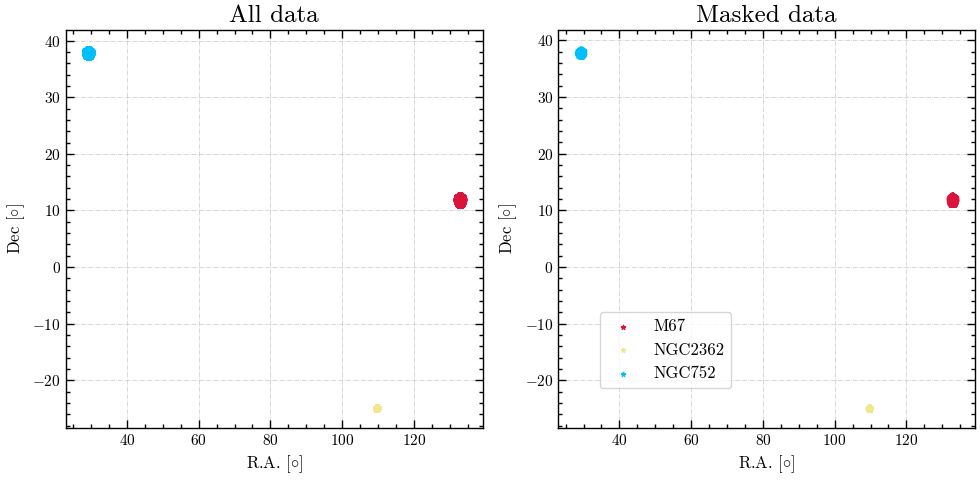

In [13]:
# Two pannel figure
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# First panel
axs[0].scatter(all_pos_m67[0], all_pos_m67[1], marker = '*', s = 10, color = colors[0], label = labels[0])
axs[0].scatter(all_pos_ngc2[0], all_pos_ngc2[1], marker = '*', s = 10, color = colors[1], label = labels[1])
axs[0].scatter(all_pos_ngc7[0], all_pos_ngc7[1], marker = '*', s = 10, color = colors[2], label = labels[2])

axs[0].set_title('All data', fontsize = 18)
axs[0].set_xlabel('R.A. $[\\circ]$', fontsize = 12)
axs[0].set_ylabel('Dec $[\\circ]$', fontsize = 12)
axs[0].tick_params(axis = 'both', labelsize = 11)
axs[0].grid(ls = '-.', linewidth = 0.5, alpha = 0.7)

# Second panel
axs[1].scatter(pos_m67[0], pos_m67[1], marker = '*', s = 10, color = colors[0], label = labels[0])
axs[1].scatter(pos_ngc2[0], pos_ngc2[1], marker = '*', s = 10, color = colors[1], label = labels[1])
axs[1].scatter(pos_ngc7[0], pos_ngc7[1], marker = '*', s = 10, color = colors[2], label = labels[2])

axs[1].set_title('Masked data', fontsize = 18)
axs[1].set_xlabel('R.A. $[\\circ]$', fontsize = 12)
axs[1].set_ylabel('Dec $[\\circ]$', fontsize = 12)
axs[1].tick_params(axis = 'both', labelsize = 11)
axs[1].grid(ls = '-.', linewidth = 0.5, alpha = 0.7)
axs[1].legend(loc = (0.1, 0.10), frameon = True, fontsize = 12)
plt.tight_layout()
plt.show()
plt.close()

It makes some sense for them to be almost identical. Now let's see just one of them (M $67$).

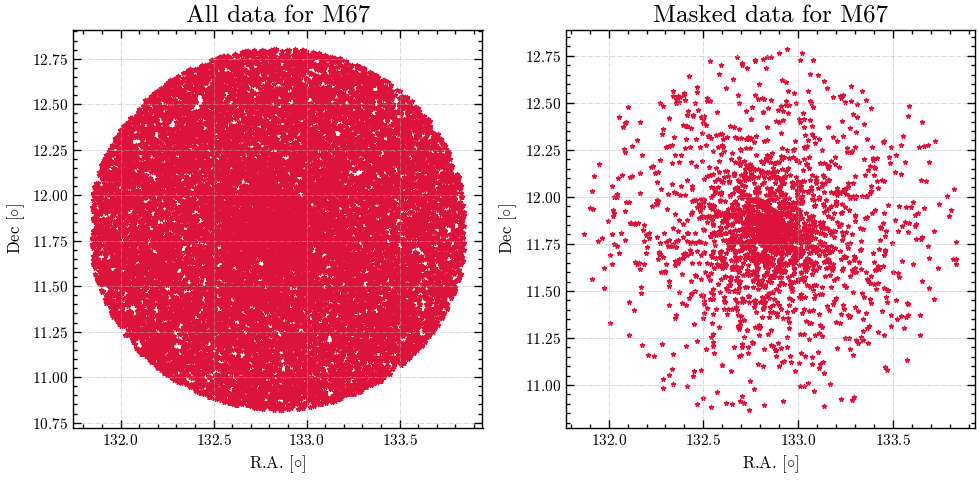

In [14]:
# Two pannel figure
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# First panel
axs[0].scatter(all_pos_m67[0], all_pos_m67[1], marker = '*', s = 10, color = colors[0])

axs[0].set_title('All data for M67', fontsize = 18)
axs[0].set_xlabel('R.A. $[\\circ]$', fontsize = 12)
axs[0].set_ylabel('Dec $[\\circ]$', fontsize = 12)
axs[0].tick_params(axis = 'both', labelsize = 11)
axs[0].grid(ls = '-.', linewidth = 0.5, alpha = 0.7)

# Second panel
axs[1].scatter(pos_m67[0], pos_m67[1], marker = '*', s = 10, color = colors[0], label = labels[0])

axs[1].set_title('Masked data for M67', fontsize = 18)
axs[1].set_xlabel('R.A. $[\\circ]$', fontsize = 12)
axs[1].set_ylabel('Dec $[\\circ]$', fontsize = 12)
axs[1].tick_params(axis = 'both', labelsize = 11)
axs[1].grid(ls = '-.', linewidth = 0.5, alpha = 0.7)
plt.tight_layout()
plt.show()
plt.close()

The shape is similar but the effect of masking is evident here.

#### Proper motion [$mas/yr$]

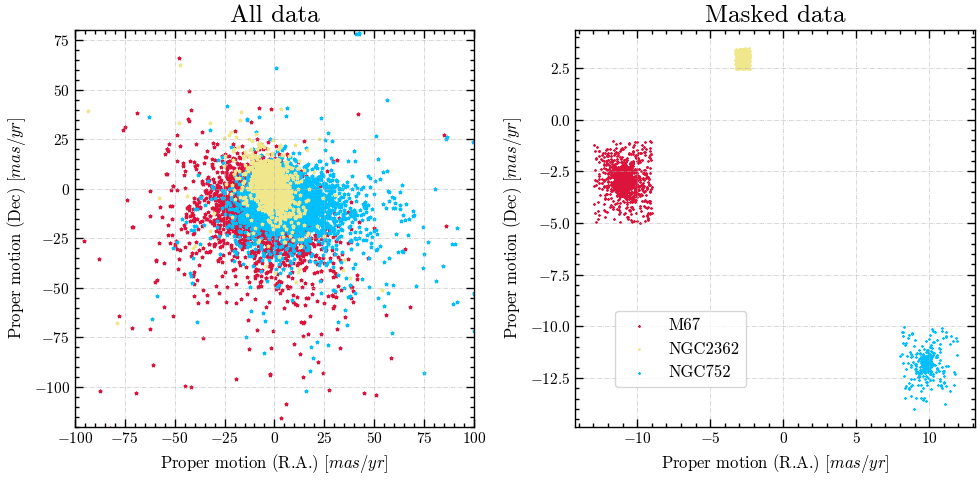

In [15]:
# Plot!
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# First panel
axs[0].scatter(all_pm_m67[0], all_pm_m67[1], marker = '*', s = 5, color = colors[0], label = labels[0])
axs[0].scatter(all_pm_ngc7[0], all_pm_ngc7[1], marker = '*', s = 5, color = colors[2], label = labels[2])
axs[0].scatter(all_pm_ngc2[0], all_pm_ngc2[1], marker = '*', s = 5, color = colors[1], label = labels[1])

axs[0].set_title('All data', fontsize = 18)
axs[0].set_xlabel('Proper motion (R.A.) $[mas/yr]$', fontsize = 12)
axs[0].set_ylabel('Proper motion (Dec) $[mas/yr]$', fontsize = 12)
axs[0].tick_params(axis = 'both', labelsize = 11)
axs[0].grid(ls = '-.', linewidth = 0.5, alpha = 0.7)
axs[0].set_ylim(-120,80)
axs[0].set_xlim(-100,100)

# Second panel
axs[1].scatter(pm_m67[0], pm_m67[1], marker = '*', s = 1, color = colors[0], label = labels[0])
axs[1].scatter(pm_ngc2[0], pm_ngc2[1], marker = '*', s = 1, color = colors[1], label = labels[1])
axs[1].scatter(pm_ngc7[0], pm_ngc7[1], marker = '*', s = 1, color = colors[2], label = labels[2])

axs[1].set_title('Masked data', fontsize = 18)
axs[1].set_xlabel('Proper motion (R.A.) $[mas/yr]$', fontsize = 12)
axs[1].set_ylabel('Proper motion (Dec) $[mas/yr]$', fontsize = 12)
axs[1].tick_params(axis = 'both', labelsize = 11)
axs[1].grid(ls = '-.', linewidth = 0.5, alpha = 0.7)
axs[1].legend(loc = (0.1, 0.1), frameon = True, fontsize = 12)
plt.tight_layout()
plt.show()
plt.close()

Clearly (after zooming in the second panel), we can conclude they're all **open clusters** because their proper motion is not low and the stars do not seem to be very gravitationally bound. 

**Note**: After this brief comparison, we'll use the masked data from now on.

### 4. Make a histogram of the proper motion of the stars in the star cluster. You can make a plot with two panels one for the R.A. component and one for the Dec component of the proper motion. 
- Make sure to use different colours for the different star clusters. 
- Make sure to define bins with equal spacing for all of the data. Tip: You can use numpy arange to define the edges of each bin. 

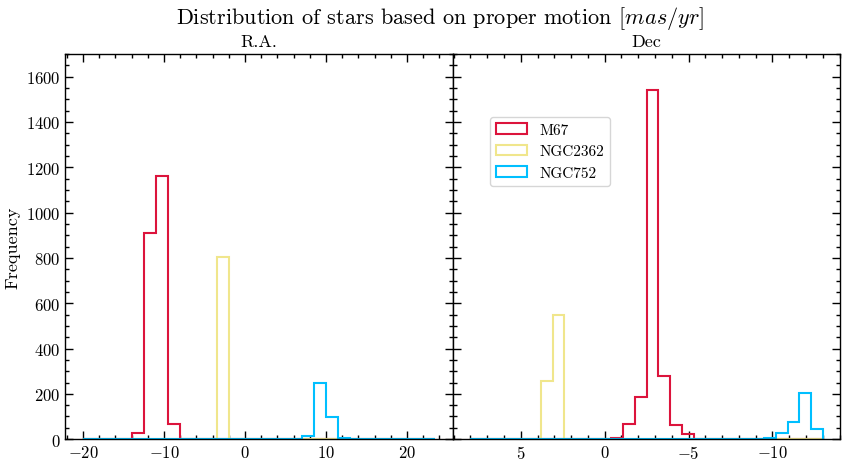

In [16]:
# Plot!
fig, axs = plt.subplots(1, 2, figsize = (10, 5), sharey=True)

# Title
fig.suptitle('Distribution of stars based on proper motion $[mas/yr]$', fontsize = 16)

# Define some common parameters for histograms
parameters = {'histtype':'step', 'linewidth': 1.5}
    
# R.A. panel
axs[0].hist(pm_m67[0], bins = np.arange(-20, 25, 1.5), color = colors[0], label = labels[0], **parameters)
axs[0].hist(pm_ngc2[0], bins = np.arange(-20, 25, 1.5), color = colors[1], label = labels[1], **parameters)
axs[0].hist(pm_ngc7[0], bins = np.arange(-20, 25, 1.5), color = colors[2], label = labels[2], **parameters)
axs[0].set_title(r'R.A.', fontsize = 13)
axs[0].set_ylabel('Frequency', fontsize = 13)
axs[0].set_ylim(0, 1700)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].tick_params(axis='x', labelsize=12)

# Dec panel
axs[1].hist(pm_m67[1], bins = np.arange(-13, 8, 21/30), color = colors[0], **parameters)
axs[1].hist(pm_ngc2[1], bins = np.arange(-13, 8, 21/30), color = colors[1], **parameters)
axs[1].hist(pm_ngc7[1], bins = np.arange(-13, 8, 21/30), color = colors[2], **parameters)
axs[1].set_title(r'Dec', fontsize = 13)
axs[1].set_ylim(0, 1700)
axs[1].tick_params(axis='x', labelsize=12)

# No space in between and invert the second axis
plt.subplots_adjust(wspace = 0) 
plt.gca().invert_xaxis()

fig.legend(frameon = True, loc = (0.58,0.60), fontsize = 11)

plt.show()

The $x$-axis in Dec was reversed to make the comparisons between the histograms and the clusters easier. The results seem good.

### 5. Make a histogram of the parallax of the proper motion selected stars. Display all $3$ clusters in one figure. 

In [17]:
# Little function
def get_array(data, key):
    '''
    Gets an array of a dataset (data) given a column name (key).
    '''
    return data[key]

In [18]:
# Use it for each
parallax_m67 = get_array(good_m67, 'parallax')
parallax_ngc2 = get_array(good_ngc2, 'parallax')
parallax_ngc7 = get_array(good_ngc7, 'parallax')

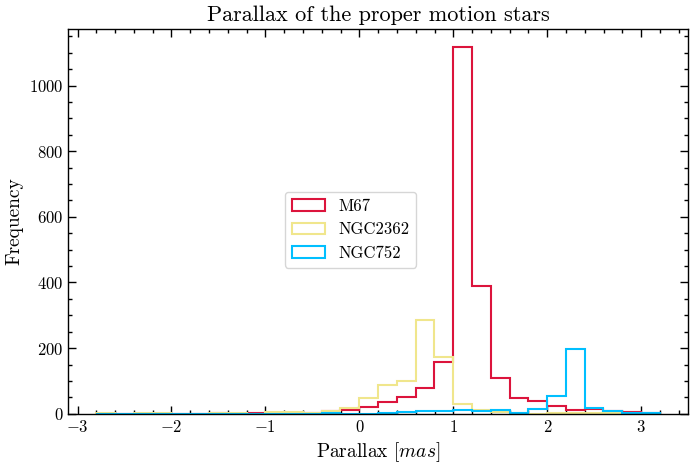

In [19]:
# And plot them in a three panel figure
plt.figure(figsize=(8, 5))

# Main title
plt.title('Parallax of the proper motion stars', fontsize = 16)

# Parallax
plt.hist(parallax_m67, bins = np.arange(min(parallax_ngc2), max(parallax_ngc2), 0.2),
         color = colors[0], label = labels[0], **parameters)
plt.hist(parallax_ngc2, bins = np.arange(min(parallax_ngc2), max(parallax_ngc2), 0.2),
         color = colors[1], label = labels[1], **parameters)
plt.hist(parallax_ngc7, bins = np.arange(min(parallax_ngc2), max(parallax_ngc2), 0.2),
         color = colors[2], label = labels[2], **parameters)

plt.xlabel(r'Parallax $[mas]$', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.legend(loc = (0.35, 0.38), frameon = True, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.show()
plt.close()

We noticed there are some (not many) stars with *negative parallax*, which should not be possible as the minimum value of parallax is $0$ (for far away stars). We proceed to remove such values and re-plot (we should have checked this before doing any plot). 

In [20]:
# We define the following function
def remove_negatives(array):
    '''
    Gets rid of negative values in an array.
    Places nan's instead to keep the same shape.
    '''
    return np.where(array < 0, np.nan, array)

In [21]:
# Use it
pos_prllx_m67 = remove_negatives(parallax_m67)
pos_prllx_ngc2 = remove_negatives(parallax_ngc2)
pos_prllx_ngc7 = remove_negatives(parallax_ngc7)

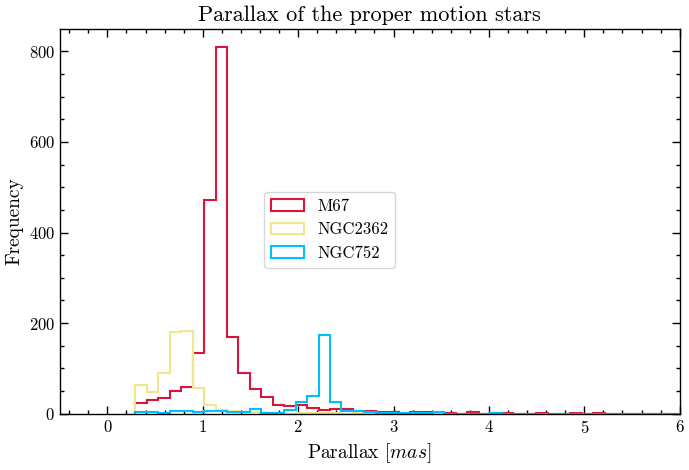

In [22]:
# Plot!
plt.figure(figsize=(8, 5))

# Title
plt.title('Parallax of the proper motion stars', fontsize = 16)

# Parallax histograms
plt.hist(pos_prllx_m67, bins = np.arange(min(pos_prllx_ngc7), max(pos_prllx_ngc7), 0.12),
         color = colors[0], label = labels[0], **parameters)
plt.hist(pos_prllx_ngc2, bins = np.arange(min(pos_prllx_ngc7), max(pos_prllx_ngc7), 0.12),
         color = colors[1], label = labels[1], **parameters)
plt.hist(pos_prllx_ngc7, bins = np.arange(min(pos_prllx_ngc7), max(pos_prllx_ngc7), 0.12),
         color = colors[2], label = labels[2], **parameters)

plt.xlabel(r'Parallax $[mas]$', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xlim(-0.5,6)
plt.legend(loc = (0.33,0.38), frameon = True, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.show()
plt.close()

Now the distribution looks correct!

#### On negative parallax
Here, we'll check the magnitude of the uncertainties associated with reported negative parallax to see how it compares to that of the positive values. To do it, the column **'parallax_error'** will be used.

In [23]:
# Function
def analyze_negative_parallax(data, cluster_name):
    '''
    Given a table, compares the mean of uncertainties of negative parallax
    with the mean of negative parallax itself. Also computes ans compares 
    the mean of errors of positive parallax.

    Inputs: data (table) -> table to be analyzed
            cluster_name (string) -> name of the cluster.

    Outputs: No outputs, but prints the results from the analyses.

    Author: MAY.
    '''
    # 1.-------------------Get the arrays -------------------------------
    
    # Get an array where 1 means that the value of parallax is negative
    binary_array = np.array(data['parallax'] < 0).astype(int)

    # Get the indexes of the negative and positive parallax
    negative_indexes = np.argsort(binary_array)[-sum(binary_array):]
    positive_indexes = np.argsort(binary_array)[0:len(binary_array) - sum(binary_array)]

    # And use the first to get the negative parallax values
    negative_prllx_values = np.array(data['parallax'])[negative_indexes]
    
    # and the error arrays
    negative_prllx_error = np.array(data['parallax_error'])[negative_indexes]
    positive_prllx_error = np.array(data['parallax_error'])[positive_indexes]


    # 2.--------------------Comparison-----------------------------------

    # We compute the mean of each
    negative_error_mean = np.nanmean(negative_prllx_error)
    positive_error_mean = np.nanmean(positive_prllx_error)

    negative_prllx_mean = np.nanmean(negative_prllx_values)

    # Then, we define the following quantities
    ratio_1 = negative_error_mean/positive_error_mean
    ratio_2 = abs(negative_error_mean/negative_prllx_mean)
    
    # And finally
    if negative_error_mean > positive_error_mean:
        print(f'In {cluster_name}, the mean of the errors of negative parallax is {ratio_2:.3} times the mean of negative parallax values themselves!\nAlso, this mean is {ratio_1:.3} times that of positive values.\n')

    else:
        print(f'The mean of the errors of negative parallax is not higher that that of positive values.')

In [24]:
# Call the function for each and see
analyze_negative_parallax(m_67, labels[0])
analyze_negative_parallax(ngc_2, labels[1])
analyze_negative_parallax(ngc_7, labels[2])

In M67, the mean of the errors of negative parallax is 1.28 times the mean of negative parallax values themselves!
Also, this mean is 2.31 times that of positive values.

In NGC2362, the mean of the errors of negative parallax is 1.13 times the mean of negative parallax values themselves!
Also, this mean is 1.87 times that of positive values.

In NGC752, the mean of the errors of negative parallax is 1.36 times the mean of negative parallax values themselves!
Also, this mean is 2.04 times that of positive values.



That the mean of the errors can be compared with the mean of their parallax values (being higher in all cases!), and, additionally, that it is almost at least *twice* as much as that of positive parallax in all three cases help justify our decision to remove them.

### 6. Calculate the distance and make a histogram of the calculated distances. Include data from all star clusters in one histogram. Which star cluster is the furthest?
The distance can be calculated with $$d = \frac{1}{p},$$ where $p$ is the parallax in arcseconds. The parallax in the GAIA data table is in milliarcseconds. 


In [25]:
# Simply
d_m67 = 1000/(pos_prllx_m67)
d_ngc2 = 1000/(pos_prllx_ngc2)
d_ngc7 = 1000/(pos_prllx_ngc7)

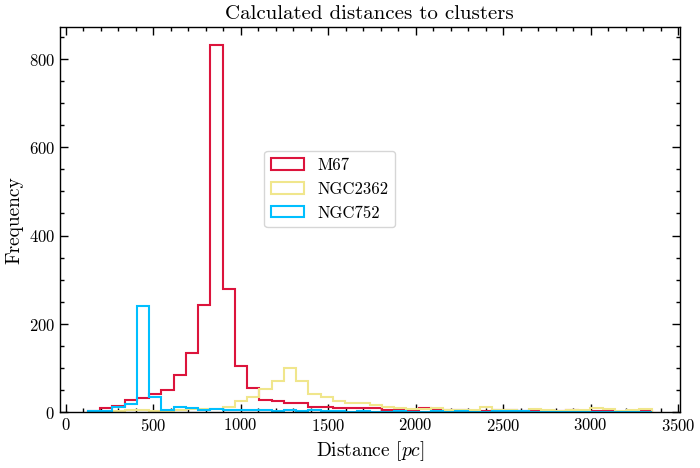

In [26]:
# And plot them in a three panel figure
plt.figure(figsize=(8, 5))

plt.title('Calculated distances to clusters', fontsize = 15)

# Parallax
plt.hist(d_m67, bins = np.arange(min(d_ngc7), max(d_ngc7), 0.07e3),
         color = colors[0], label = labels[0], **parameters)
plt.hist(d_ngc2, bins = np.arange(min(d_ngc7), max(d_ngc7), 0.07e3),
         color = colors[1], label = labels[1], **parameters)
plt.hist(d_ngc7, bins = np.arange(min(d_ngc7), max(d_ngc7), 0.07e3),
         color = colors[2], label = labels[2], **parameters)

plt.xlabel(r'Distance $[pc]$', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.legend(loc = (0.33,0.48), frameon = True, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()
plt.close()

After inspection, we've decided to remove values higher than some *threshold* in each array because the majority of values is below said threshold, which can affect our later estimation of the distance. 

In [27]:
# Little function
def remove_large(array, threshold):
    '''
    Removes large values in an array given a threshold (float).
    '''
    return np.where(array > threshold, np.nan, array)

In [28]:
# Call it
d_m67_clean = remove_large(d_m67, threshold = 2000)
d_ngc2_clean = remove_large(d_ngc2, threshold = 2500)
d_ngc7_clean = remove_large(d_ngc7, threshold = 650)

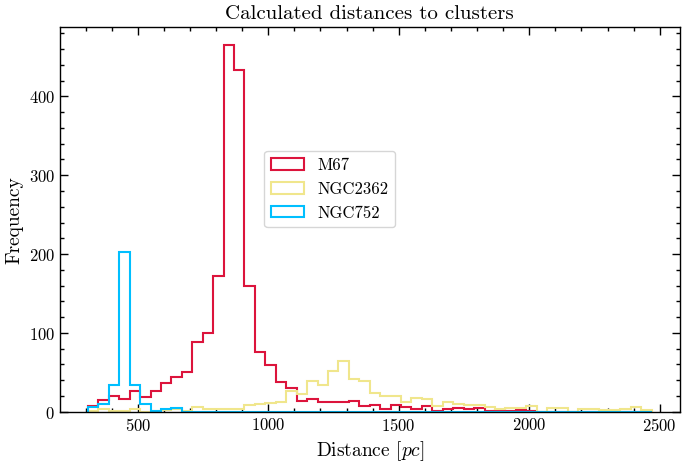

In [29]:
# And plot them in a three panel figure
plt.figure(figsize=(8, 5))

# Main title
plt.title('Calculated distances to clusters', fontsize = 15)

# Parallax
plt.hist(d_m67_clean, bins = np.arange(min(d_ngc2_clean), max(d_ngc2_clean), 0.04e3),
         color = colors[0], label = labels[0], **parameters)
plt.hist(d_ngc2_clean, bins = np.arange(min(d_ngc2_clean), max(d_ngc2_clean), 0.04e3),
         color = colors[1], label = labels[1], **parameters)
plt.hist(d_ngc7_clean, bins = np.arange(min(d_ngc2_clean), max(d_ngc2_clean), 0.04e3),
         color = colors[2], label = labels[2], **parameters)

plt.xlabel(r'Distance $[pc]$', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.legend(loc = (0.33,0.48), frameon = True, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.show()
plt.close()

Now we'll get a rough estimate by obtaining the mean of these values!

In [30]:
# Calculate them
mean_m67 = np.nanmean(d_m67_clean)
mean_ngc2 = np.nanmean(d_ngc2_clean)
mean_ngc7 = np.nanmean(d_ngc7_clean)

In [31]:
print(f'Estimated distances: {labels[0]} = {mean_m67:.5} pc, {labels[1]} = {mean_ngc2:.6} pc, \
{labels[2]} = {mean_ngc7:.5} pc.')

Estimated distances: M67 = 866.38 pc, NGC2362 = 1363.08 pc, NGC752 = 444.01 pc.


Our estimates are very good compared to the real values!

### 7. Calculate the G-band absolute magnitude of the stars in the star clusters. 

The absolute magnitude is given by
$$
M = m-5 \left[\log_{10}(d)-1\right],
$$
where $m$ is the apparent magnitude and $d$ is the distance to the stars.

In [32]:
# Define a simple function to compute the absolute magnitude
M = lambda m, d : m - 5*(np.log10(d)-1)

In [33]:
# Get the arrays of apparent magnitude
app_m67 = get_array(good_m67, 'phot_g_mean_mag')
app_ngc2 = get_array(good_ngc2, 'phot_g_mean_mag')
app_ngc7 = get_array(good_ngc7, 'phot_g_mean_mag')

In [34]:
# And use the lambda function for the three clusters 
gm_m67 = M(app_m67, d_m67)
gm_ngc2 = M(app_ngc2, d_ngc2)
gm_ngc7 = M(app_ngc7, d_ngc7)

### 8. Plot an HR diagram with all $3$ clusters, make sure that the main sequence of the clusters is aligned. With this we are able to directly compare the clusters. 

We'll plot color versus absolute magnitude. The key for color is **'bp_rp'**.

In [35]:
# Let's use the function defined above
col_m67 = get_array(good_m67, 'bp_rp')
col_ngc2 = get_array(good_ngc2, 'bp_rp')
col_ngc7 = get_array(good_ngc7, 'bp_rp')

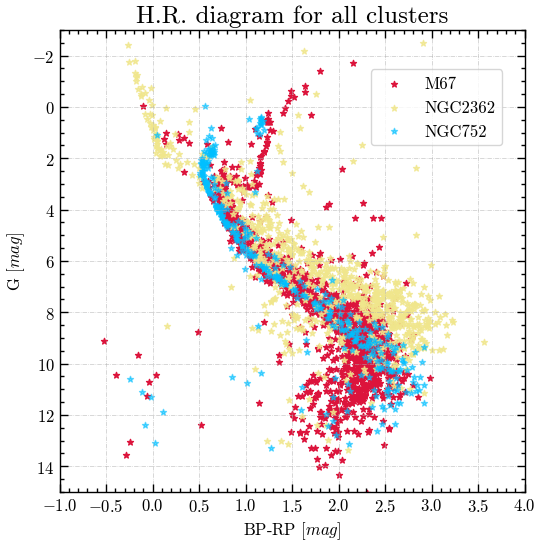

In [36]:
# Plot!
fig = plt.figure(figsize=(6, 6))

# Clusters
plt.scatter(col_m67, gm_m67,  marker = '*', s = 20, color = colors[0], label = labels[0], alpha = 1)
plt.scatter(col_ngc2, gm_ngc2, marker = '*', s = 20, color = colors[1], label = labels[1], alpha = 0.8)
plt.scatter(col_ngc7, gm_ngc7, marker = '*', s = 20, color = colors[2], label = labels[2], alpha = 0.6)

# Title and labels
plt.title('H.R. diagram for all clusters', fontsize = 18)
plt.xlabel('BP-RP $[mag]$', fontsize = 12)
plt.ylabel('G $[mag]$', fontsize = 12)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)

plt.legend(frameon = True, fontsize = 12, loc = (0.67, 0.75))

plt.grid(ls = '-.', linewidth = 0.5, alpha = 0.7)
plt.locator_params(axis = 'x', nbins = 10)
plt.locator_params(axis = 'y', nbins = 10)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12)

plt.ylim(-3, 15)
plt.xlim(-1, 4)

plt.gca().invert_yaxis()
plt.show()
plt.close()

The results seems good. The ranges of the axes are appropiate to what was expected :).

### 9. Which star cluster is the oldest and which star cluster is the youngest?

The turn-off points indicate that M $67$ is the oldest (highest) and NGC $2362$ is the youngest (lowest). Also, based on the proportion of red giants, white dwarfs and stars in the main sequence in each diagram, we can say that M $67$ is the oldest as it has a larger quantity of the first two types, while the youngest should be again NGC $2362$ since most stars are in the main sequence and it almost does not seem to have white dwarfs.

### 10. At approximately which absolute G magnitude is the *turning off point* for each of the clusters?

We'll plot each in different panels and draw horizontal lines to indicate the turn-off point.

In [37]:
# Approx turn-off points (G mag)
m67_turnoff = 3.0
ngc7_turnoff = 2.5
ngc2_turnoff = 1.7

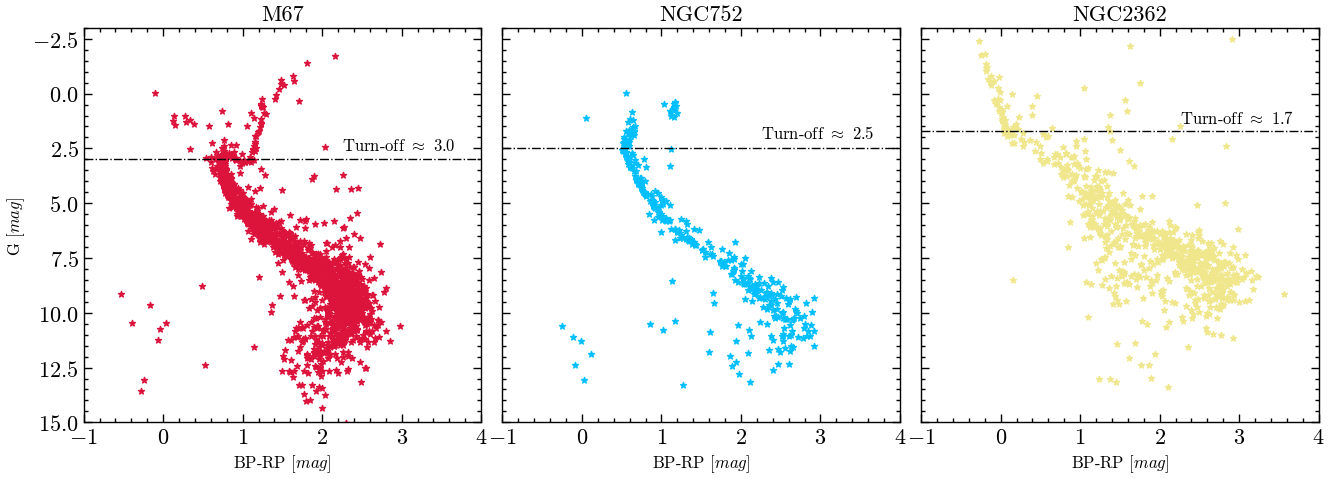

In [38]:
# Plot
fig, axes = plt.subplots(1, 3, figsize=(13.5, 5), sharey=True)

# M67
axes[0].scatter(col_m67, gm_m67, marker='*', s=20, color=colors[0])
axes[0].set_title(labels[0], fontsize=16)
axes[0].set_xlabel('BP-RP $[mag]$', fontsize=12)
axes[0].set_ylabel('G $[mag]$', fontsize=12)
axes[0].set_xlim(-1, 4)
axes[0].set_ylim(-3, 15)
axes[0].invert_yaxis()
axes[0].axhline(m67_turnoff, color = 'k', ls = '-.', lw = 1)
axes[0].text(0.65, 0.69, f'Turn-off $\\approx$ {m67_turnoff}', 
             transform=axes[0].transAxes, fontsize=12, color='k')

# NGC2362
axes[2].scatter(col_ngc2, gm_ngc2, marker='*', s=20, color=colors[1])
axes[2].set_title(labels[1], fontsize=16)
axes[2].set_xlabel('BP-RP $[mag]$', fontsize=12)
axes[2].set_xlim(-1, 4)
axes[2].set_ylim(-3, 15)
axes[2].axhline(ngc2_turnoff, color = 'k', ls = '-.', lw = 1)
axes[2].text(0.65, 0.76, f'Turn-off $\\approx$ {ngc2_turnoff}', 
             transform=axes[2].transAxes, fontsize=12, color='k')

# NGC752
axes[1].scatter(col_ngc7, gm_ngc7, marker='*', s=20, color=colors[2])
axes[1].set_title(labels[2], fontsize=16)
axes[1].set_xlabel('BP-RP $[mag]$', fontsize=12)
axes[1].set_xlim(-1, 4)
axes[1].set_ylim(-3, 15)
axes[1].axhline(ngc7_turnoff, color = 'k', ls = '-.', lw = 1)
axes[1].text(0.65, 0.72, f'Turn-off $\\approx$ {ngc7_turnoff}',
             transform=axes[1].transAxes, fontsize=12, color='k')

# Invert y-axis for all panels
for ax in axes:
    ax.invert_yaxis() 

plt.tight_layout()
plt.show()
plt.close()

As expected, the turning-off points are higher if the cluster is older.

## (b) White dwarfs 
White dwarfs are very old stars, this means that they are more likely to be found in older galaxy clusters. 

### 11. Looking at the HR-diagram with all $3$ clusters, which cluster seems to have the most white dwarf stars? 

Since white dwarfs are located at the bottom left of the HR diagram, the cluster which seems to have the most of them is M $67$.

### 12. Make an appropriate cut in the data of all $3$ clusters to select only the white dwarf stars. How many white dwarf stars did you identify in each star cluster?

We'll first append a new column with the absolute G-band magnitude for each cluster, and then select the white dwarfs. 

In [39]:
# Append each new column
good_m67['g_band_mag'] = gm_m67
good_ngc2['g_band_mag'] = gm_ngc2
good_ngc7['g_band_mag'] = gm_ngc7

In [40]:
# The limits will be the same, so define this little box
box = [['bp_rp', 'g_band_mag'], [-1, 1.25], [8, 15]]

In [41]:
# And select the white dwarfs data with our function defined above
wd_m67 = mask(good_m67, *box)
wd_ngc2 = mask(good_ngc2, *box)
wd_ngc7 = mask(good_ngc7, *box)

In [42]:
# Let's see how many we have in each cluster!
print(f'Number of white dwarfs: {labels[0]} = {len(wd_m67)}, {labels[1]} = {len(wd_ngc2)} and {labels[2]} = {len(wd_ngc7)}.')

Number of white dwarfs: M67 = 12, NGC2362 = 6 and NGC752 = 10.


### 13. Make an HR-diagram only with the white dwarf stars of all $3$ clusters. Make sure to use absolute G-band magnitudes for the $y$-axis. 

We just get the corresponding arrays as done above.

In [43]:
# Select the arrays with our function
hr_wd_m67 = get_mini_set(wd_m67, *box[0])
hr_wd_ngc2 = get_mini_set(wd_ngc2, *box[0])
hr_wd_ngc7 = get_mini_set(wd_ngc7, *box[0])

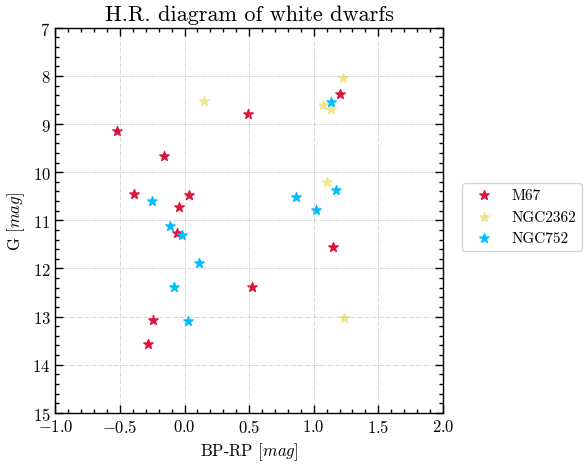

In [44]:
# And plot it!
fig = plt.figure(figsize=(5, 5))

# Clusters
plt.scatter(hr_wd_m67[0], hr_wd_m67[1],  marker = '*', s = 50, color = colors[0], label = labels[0])
plt.scatter(hr_wd_ngc2[0], hr_wd_ngc2[1], marker = '*', s = 50, color = colors[1], label = labels[1])
plt.scatter(hr_wd_ngc7[0], hr_wd_ngc7[1], marker = '*', s = 50, color = colors[2], label = labels[2])

# Title and labels
plt.title('H.R. diagram of white dwarfs', fontsize = 16)
plt.xlabel('BP-RP $[mag]$', fontsize = 12)
plt.ylabel('G $[mag]$', fontsize = 12)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)

plt.legend(frameon = True, fontsize = 11, loc = (1.05, 0.42))

plt.grid(ls = '-.', linewidth = 0.5, alpha = 0.7)
plt.locator_params(axis = 'x', nbins = 10)
plt.locator_params(axis = 'y', nbins = 10)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12)

plt.ylim(7, 15)
plt.xlim(-1, 2)

plt.gca().invert_yaxis()
plt.show()
plt.close()

This helps confirm we did it right because it is the same as just looking at the bottom left part of the HR diagram of all the data.

### 14. Make a proper motion diagram (pm_ra, pm_dec) of each galaxy cluster highlighting the white dwarfs in the clusters. 

In [45]:
# Define the keys
pm_keys = ['pmra', 'pmdec']

In [46]:
# And get them!
pm_wd_m67 = get_mini_set(wd_m67, *pm_keys)
pm_wd_ngc2 = get_mini_set(wd_ngc2, *pm_keys)
pm_wd_ngc7 = get_mini_set(wd_ngc7, *pm_keys)

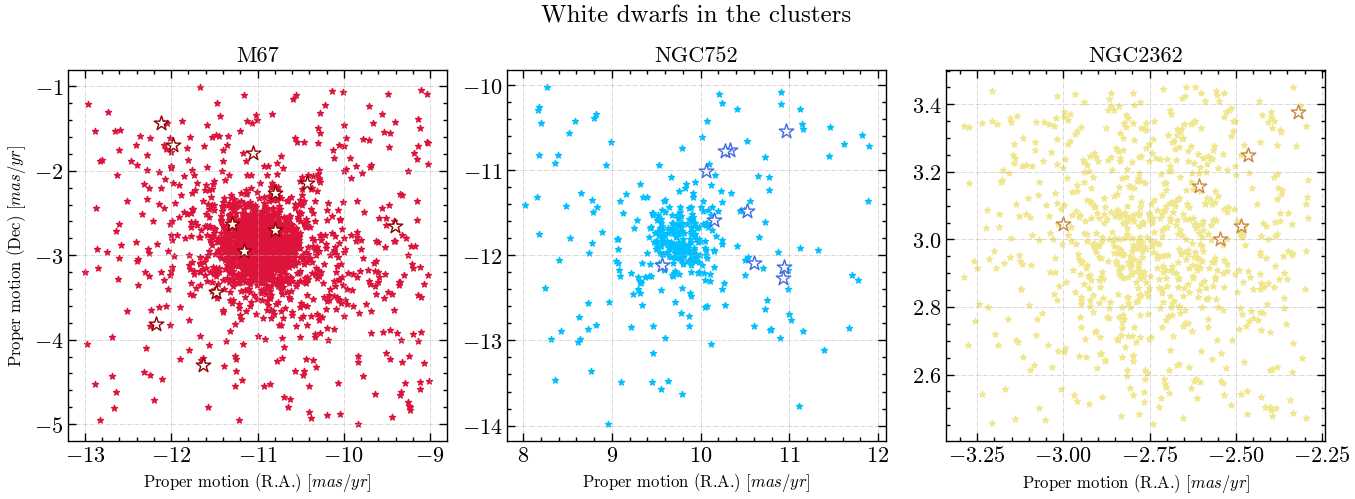

In [47]:
# Plot
fig, axes = plt.subplots(1, 3, figsize=(13.5, 5.15))

plt.suptitle('White dwarfs in the clusters', fontsize = 18, x = 0.523)

# M67
axes[0].scatter(pm_m67[0], pm_m67[1], marker='*', s=20, color=colors[0])
axes[0].scatter(pm_wd_m67[0], pm_wd_m67[1], marker='*', s=120, facecolors='white', edgecolors='darkred')
axes[0].set_title(labels[0], fontsize=16)
axes[0].set_xlabel('Proper motion (R.A.) $[mas/yr]$', fontsize=12)
axes[0].set_ylabel('Proper motion (Dec) $[mas/yr]$', fontsize=12)
axes[0].grid(ls='-.', linewidth=0.5, alpha=0.7)

# NGC2362
axes[2].scatter(pm_ngc2[0], pm_ngc2[1], marker='*', s=20, color=colors[1])
axes[2].scatter(pm_wd_ngc2[0], pm_wd_ngc2[1], marker='*', s=120, facecolors='white', edgecolors='peru')
axes[2].set_title(labels[1], fontsize=16)
axes[2].set_xlabel('Proper motion (R.A.) $[mas/yr]$', fontsize=12)
axes[2].grid(ls='-.', linewidth=0.5, alpha=0.7)

# NGC752
axes[1].scatter(pm_ngc7[0], pm_ngc7[1], marker='*', s=20, color=colors[2])
axes[1].scatter(pm_wd_ngc7[0], pm_wd_ngc7[1], marker='*', s=120, facecolors='white', edgecolors='royalblue')
axes[1].set_title(labels[2], fontsize=16)
axes[1].set_xlabel('Proper motion (R.A.) $[mas/yr]$', fontsize=12)
axes[1].grid(ls='-.', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()
plt.close()

Here white dwarfs are bigger :).

## (c) Multiple stellar systems and variable stars

### 15. The data table has a column called 'non_single_star'. Use a selection cut to identify multiple stellar systems. How many multiple systems did you find in each star cluster?

According to the documentation (source below), this column indicates whether the source has been identified as a non-single star by some of the DPAC processing chains or not. They use three bits to convey information about the nature of the non-single star model:

- Bit $1$ is set to $1$ in case of an astrometric binary, `001`.

- Bit $2$ is set to $1$ in case of a spectroscopic binary, `010`.

- Bit $3$ is set to $1$ in case of an eclisping binary, `100`.

Note: Some models can be combinations of two of the non-single star natures.

Source: https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_main_source_catalogue/ssec_dm_gaia_source.html

With this information, I made a little table with what *I think* the classification should be.

|  |    **Non-single star classification**       |           |
|:-----------------------------------:|:---------:|:---------|
| **Identifier**                    | **Bits format** | **Binary type(s)**                  |
| $0$                              | `000`      | Non-binary (single)                        |
| $1$                              | `001`      | Astrometric                   |
| $2$                              | `010`      | Spectroscopic                 |
| $3$                              | `011`      | Astrometric, spectroscopic    |
| $4$                              | `100`      | Eclipsing                     |
| $5$                              | `101`      | Astrometric, eclipsing        |
| $6$                              | `110`      | Spectroscopic, eclipsing      |

In [48]:
# Now, let's first see which types the clusters contain
print(f"Types: {labels[0]} = {np.unique(np.array(good_m67['non_single_star']))}, {labels[1]} = {np.unique(np.array(good_ngc2['non_single_star']))} and {labels[2]} = {np.unique(np.array(good_ngc7['non_single_star']))}.")

Types: M67 = [0 1 2 3], NGC2362 = [0 1] and NGC752 = [0 1 2].


Then, the present binary types are $4$: single, astrometric, spectroscopic and a combination of the last two. 

In [49]:
# Define a little function to select the binary systems data
def get_non_single(data):
    '''
    Gets data of stars classified as non-single. 
    '''
    # Define the condition and use it
    condition = data['non_single_star'] != 0

    return data[condition]

In [50]:
# And call it
ns_m67 = get_non_single(good_m67)
ns_ngc2 = get_non_single(good_ngc2)
ns_ngc7 = get_non_single(good_ngc7)

In [51]:
print(f'Number of stars in multiple stellar systems: {labels[0]} = {len(ns_m67)}, {labels[1]} = {len(ns_ngc2)} and {labels[2]} = {len(ns_ngc7)}.')

Number of stars in multiple stellar systems: M67 = 25, NGC2362 = 1 and NGC752 = 5.


  ### 16. Make one HR diagram where you display single stars in one colour (e.g. blue for all $3$ clusters) and mark the multiple stellar systems in a different colour. 

In [52]:
# Get the proper motion data (we'll use the first element of the box defined above)
hr_ns_m67 = get_mini_set(ns_m67, *box[0])
hr_ns_ngc2 = get_mini_set(ns_ngc2, *box[0])
hr_ns_ngc7 = get_mini_set(ns_ngc7, *box[0])

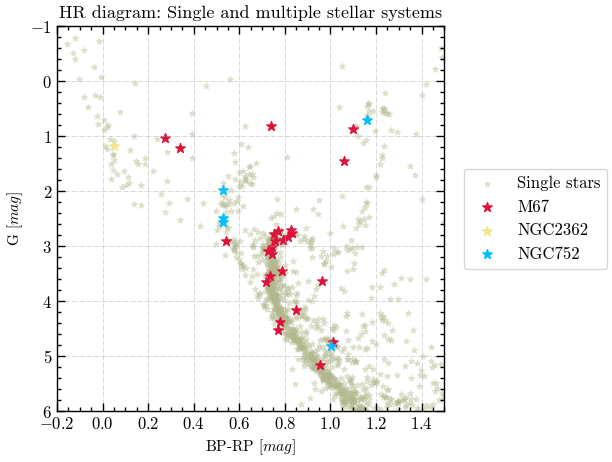

In [53]:
# Plot!
fig = plt.figure(figsize=(5, 5))

# Clusters
plt.scatter(col_m67, gm_m67,  marker = '*', s = 20, color = '#B2B88D', alpha = 0.3)
plt.scatter(col_ngc2, gm_ngc2, marker = '*', s = 20, color = '#B2B88D', alpha = 0.3)
plt.scatter(col_ngc7, gm_ngc7, marker = '*', s = 20, color = '#B2B88D', alpha = 0.3, label = 'Single stars')

# Stars from multiple systems
plt.scatter(hr_ns_m67[0], hr_ns_m67[1],  marker = '*', s = 50, color = colors[0], label = labels[0])
plt.scatter(hr_ns_ngc2[0], hr_ns_ngc2[1], marker = '*', s = 50, color = colors[1], label = labels[1])
plt.scatter(hr_ns_ngc7[0], hr_ns_ngc7[1], marker = '*', s = 50, color = colors[2], label = labels[2])

# Title and labels
plt.title('HR diagram: Single and multiple stellar systems', fontsize = 13)
plt.xlabel('BP-RP $[mag]$', fontsize = 11)
plt.ylabel('G $[mag]$', fontsize = 11)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)

plt.legend(frameon = True, fontsize = 12, loc = (1.05, 0.37))

plt.grid(ls = '-.', linewidth = 0.5, alpha = 0.7)
plt.locator_params(axis = 'x', nbins = 11)
plt.locator_params(axis = 'y', nbins = 10)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12)

plt.ylim(-1, 6)
plt.xlim(-0.2, 1.5)

plt.gca().invert_yaxis()
plt.show()
plt.close()

We zoomed in to observe them better.

### 17. Which part of the HR-diagram are the multiple stellar systems? 

Curiously, the majority is found close to (and in) the turning off points. Some of them are also in the main sequence and a few have left it.

### 18. The data table has a column called 'phot_variable_flag'. These are variable stars identified in the GAIA data.  Use a selection cut to identify variable stars. How many variable stars did you find in each star cluster?

In [54]:
# After inspection, define this
def get_variable(data):
    '''
    Gets data about variable stars in a table.
    '''
    # Define the condition and use it
    condition = data['phot_variable_flag'] == 'VARIABLE'

    return data[condition]

In [55]:
# And call it
var_m67 = get_variable(good_m67)
var_ngc2 = get_variable(good_ngc2)
var_ngc7 = get_variable(good_ngc7)

In [56]:
# Lets see how many we have in each cluster
print(f'Number of variable stars: {labels[0]} = {len(var_m67)}, {labels[1]} = {len(var_ngc2)} and {labels[2]} = {len(var_ngc7)}.')

Number of variable stars: M67 = 40, NGC2362 = 76 and NGC752 = 13.


### 19. Make one HR diagram where you display the non variable stars in one colour (e.g. blue for all $3$ clusters) and mark the variable stars in a different colour. 


In [57]:
hr_var_m67 = get_mini_set(var_m67, *box[0])
hr_var_ngc2 = get_mini_set(var_ngc2, *box[0])
hr_var_ngc7 = get_mini_set(var_ngc7, *box[0])

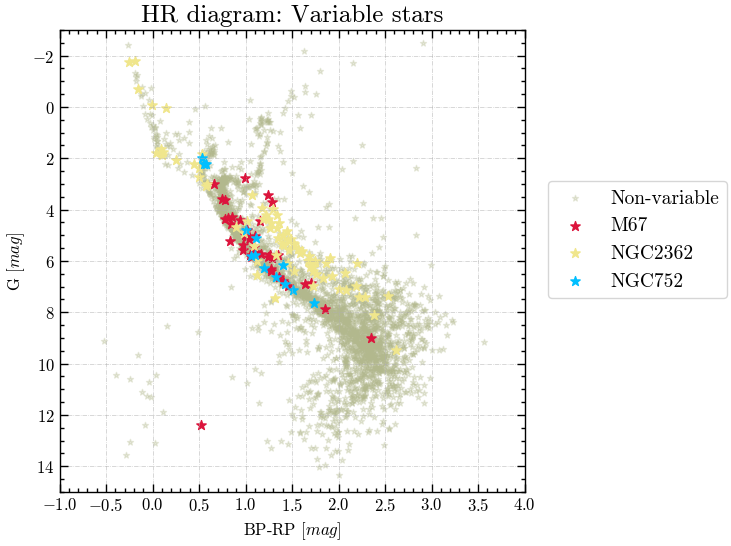

In [58]:
# Plot!
fig = plt.figure(figsize=(6, 6))

# Clusters
plt.scatter(col_m67, gm_m67,  marker = '*', s = 20, color = '#B2B88D', alpha = 0.3)
plt.scatter(col_ngc2, gm_ngc2, marker = '*', s = 20, color = '#B2B88D', alpha = 0.3)
plt.scatter(col_ngc7, gm_ngc7, marker = '*', s = 20, color = '#B2B88D', alpha = 0.3, label = 'Non-variable')

# Stars from multiple systems
plt.scatter(hr_var_m67[0], hr_var_m67[1],  marker = '*', s = 50, color = colors[0], label = labels[0])
plt.scatter(hr_var_ngc2[0], hr_var_ngc2[1], marker = '*', s = 50, color = colors[1], label = labels[1])
plt.scatter(hr_var_ngc7[0], hr_var_ngc7[1], marker = '*', s = 50, color = colors[2], label = labels[2])

# Title and labels
plt.title('HR diagram: Variable stars', fontsize = 18)
plt.xlabel('BP-RP $[mag]$', fontsize = 12)
plt.ylabel('G $[mag]$', fontsize = 12)
plt.yticks(fontsize = 11)
plt.xticks(fontsize = 11)

plt.legend(frameon = True, fontsize = 14, loc = (1.05, 0.42))

plt.grid(ls = '-.', linewidth = 0.5, alpha = 0.7)
plt.locator_params(axis = 'x', nbins = 10)
plt.locator_params(axis = 'y', nbins = 10)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12)

plt.ylim(-3, 15)
plt.xlim(-1, 4)

plt.gca().invert_yaxis()
plt.show()
plt.close()

### 20. Which part of the HR-diagram are the variable stars?

Most of them are located in the main sequence with few exceptions (e.g. that white dwarf from M $67$).

### Final comment
Thank you for preparing this homework, prof. Helga :)! I enjoyed doing it, and I think it contributed a lot to my learning process. I do not know why doing it, in some sense, felt like taking a rest from everything else. Thank you.